In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from keras import layers, models
from keras.optimizers import Adam

In [36]:
# -extract data-
data = pd.read_csv('C:\\Users\\Lenovo\\Desktop\\Cancer_Data.csv')
data = data.dropna(axis=1, how='any')
data = data.drop('diagnosis', axis=1)
data = data.drop('id', axis=1)
#print(data)
#print(data.head())

In [37]:
# -normalize-
#scaler = StandardScaler()
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# -training and testing sets-
X_train, X_test = train_test_split(data_scaled, test_size=0.2, random_state=42)

# -autoencoder architecture-
input_dim = X_train.shape[1]

# -encoder-
input_layer = layers.Input(shape=(input_dim,))
encoded = layers.Dense(64, activation='relu')(input_layer)
encoded = layers.Dense(32, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)
latent_space = layers.Dense(8, activation='relu')(encoded)

# -decoder-
decoded = layers.Dense(32, activation='relu')(latent_space)
decoded = layers.Dense(32, activation='relu')(decoded)
decoded = layers.Dense(64, activation='relu')(decoded)
output_layer = layers.Dense(input_dim, activation='sigmoid')(decoded)

# -model-
autoencoder = models.Model(inputs=input_layer, outputs=output_layer)
learning_rate = 0.01  
optimizer = Adam(learning_rate=learning_rate)
autoencoder.compile(optimizer='adam', loss='mse')

In [38]:
# -training-
autoencoder.fit(X_train, X_train, epochs=200, batch_size=16, validation_data=(X_test, X_test), verbose=1)

reconstructed = autoencoder.predict(X_test)
reconstruction_errors = np.mean(np.square(X_test - reconstructed), axis=1)

Epoch 1/200
29/29 [==============================] - 1s 6ms/step - loss: 0.0793 - val_loss: 0.0430
Epoch 2/200
29/29 [==============================] - 0s 2ms/step - loss: 0.0339 - val_loss: 0.0253
Epoch 3/200
29/29 [==============================] - 0s 2ms/step - loss: 0.0212 - val_loss: 0.0154
Epoch 4/200
29/29 [==============================] - 0s 2ms/step - loss: 0.0145 - val_loss: 0.0133
Epoch 5/200
29/29 [==============================] - 0s 2ms/step - loss: 0.0124 - val_loss: 0.0107
Epoch 6/200
29/29 [==============================] - 0s 2ms/step - loss: 0.0110 - val_loss: 0.0099
Epoch 7/200
29/29 [==============================] - 0s 2ms/step - loss: 0.0102 - val_loss: 0.0089
Epoch 8/200
29/29 [==============================] - 0s 2ms/step - loss: 0.0094 - val_loss: 0.0082
Epoch 9/200
29/29 [==============================] - 0s 2ms/step - loss: 0.0086 - val_loss: 0.0074
Epoch 10/200
29/29 [==============================] - 0s 2ms/step - loss: 0.0076 - val_loss: 0.0064
Epoch 11/

In [39]:
r2 = r2_score(X_test, reconstructed)
print(f"R² Score: {r2}")

R² Score: 0.8989087635640466


In [40]:
# -threshold for anomalies-
threshold = np.percentile(reconstruction_errors, 95)  #top 5%
anomalies = reconstruction_errors > threshold
print("Anomalies detected:", np.sum(anomalies))

anomalous_data = X_test[anomalies]
print("Anomalous data points:")
print(anomalous_data)

anomaly_indices = np.where(anomalies)[0]  
print("Indices of anomalies:", anomaly_indices)

Anomalies detected: 6
Anomalous data points:
[[0.43915945 0.41156578 0.44025983 0.28984093 0.57660016 0.33408993
  0.4215089  0.39666998 0.40858586 0.32350463 0.16625023 0.24239745
  0.1038496  0.09510308 0.30074447 0.2651786  0.14744949 0.22466376
  0.45502899 0.18283515 0.34863038 0.35154584 0.31520494 0.19416044
  0.4717031  0.17881848 0.26709265 0.35979381 0.23082988 0.1606323 ]
 [0.57357187 0.56070342 0.58952388 0.41930011 0.62173874 0.48990859
  0.45384255 0.73011928 0.28989899 0.46925021 0.14756473 0.56351662
  0.23766668 0.11262276 0.19825271 0.43746808 0.05388889 0.34911915
  0.31910283 0.32804057 0.44112416 0.55170576 0.45266199 0.27349587
  0.44925048 0.24682986 0.1942492  0.63264605 0.14705303 0.24262102]
 [0.32935775 0.11701048 0.32147053 0.19117709 0.6515302  0.23977057
  0.2366448  0.32877734 0.46262626 0.30770851 0.15737824 0.50274045
  0.15709372 0.07085944 0.28306761 0.22695046 0.12027778 0.54044327
  0.13041031 0.16006799 0.2379936  0.08955224 0.21968226 0.11504621
 

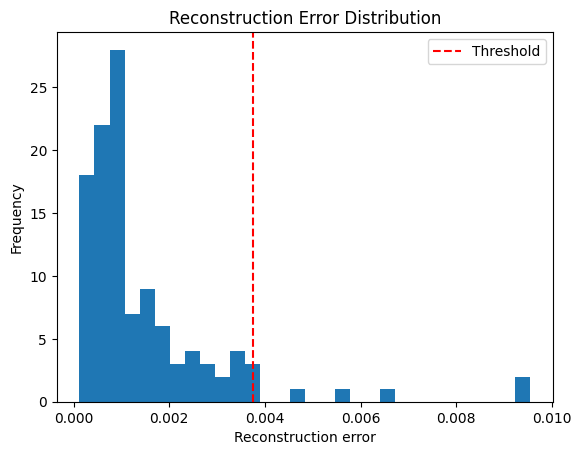

In [41]:
# -plot-
plt.hist(reconstruction_errors, bins=30)
plt.xlabel("Reconstruction error")
plt.ylabel("Frequency")
plt.title("Reconstruction Error Distribution")
plt.axvline(threshold, color='red', linestyle='--', label='Threshold')
plt.legend()
plt.savefig('Breast Cancer Anomaly Detection.png')
plt.show()

In [45]:
# Assuming y_test is 1 for normal and 0 for anomalous
predicted_labels = np.where(anomalies, 0, 1)  # 0 = anomaly, 1 = normal

# -confusion matrix-
cm = confusion_matrix(y_test, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Anomalous', 'Normal'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

NameError: name 'y_test' is not defined